# Model #5: AlexNet

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt #pip install matplotlib
import numpy as np # pip install numpy

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D, MaxPooling2D, MaxPool2D, BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import model_from_json

# 1.Load a dataset(sort of)

In [2]:
train_dir = pathlib.Path(r"C:\Users\aghen\OneDrive\Desktop/flavia_for_cnn/train")
test_dir = pathlib.Path(r"C:\Users\aghen\OneDrive\Desktop//flavia_for_cnn/test")
val_dir = pathlib.Path(r"C:\Users\aghen\OneDrive\Desktop/flavia_for_cnn/val")


class_names = list([item.name for item in train_dir.glob('*')])
print("Classes:", class_names)


image_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = image_generator.flow_from_directory(train_dir,
                                                      target_size = (150,150),
                                                      batch_size=8,
                                                      class_mode='categorical',
                                                      shuffle = False)

test_generator = image_generator.flow_from_directory(test_dir,
                                                     target_size=(150,150),
                                                     batch_size=8,
                                                     class_mode='categorical',
                                                     shuffle = False)
val_generator = image_generator.flow_from_directory(val_dir,
                                                     target_size=(150,150),
                                                     batch_size=8,
                                                     class_mode='categorical',
                                                     shuffle = False)

Classes: ['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9']
Found 523 images belonging to 12 classes.
Found 96 images belonging to 12 classes.
Found 88 images belonging to 12 classes.


# 2.Preprocess dataset

In [3]:
#done already

# 3.Build model

In [4]:
model = Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')
])

# 4.Plot the model as a graph

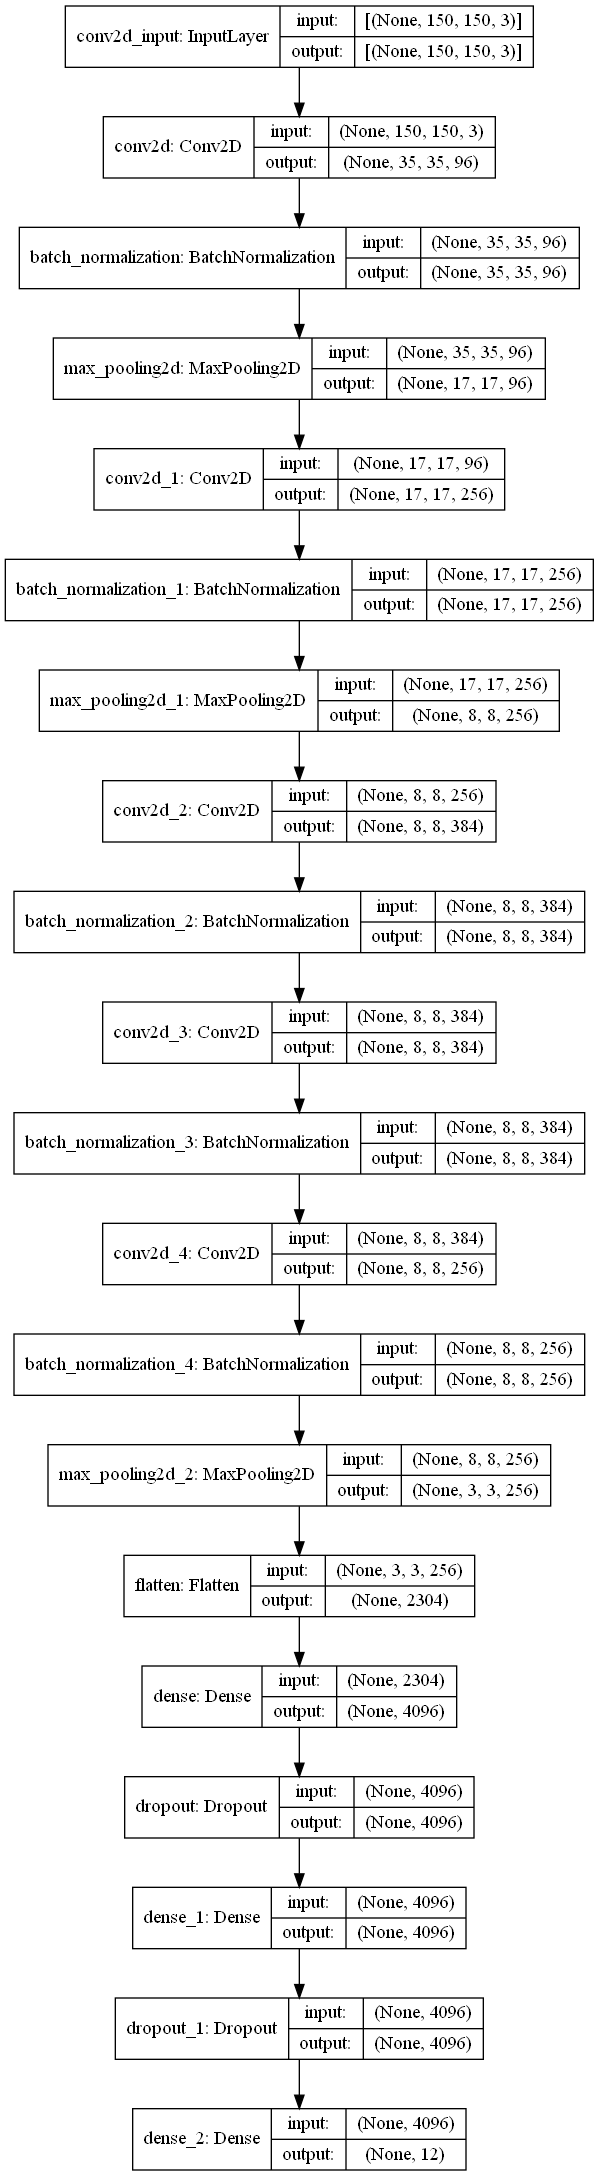

In [5]:
tf.keras.utils.plot_model(model, to_file='file.png', show_shapes=True)
#pip install pydot

# 5.Compile the model

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6.Fit your model


In [7]:
trained = model.fit(train_generator,
                    epochs = 10,
                    verbose = 1,
                    validation_data=val_generator
                    );


Epoch 1/10
66/66 [==============================] - 45s 637ms/step - loss: 7.2994 - accuracy: 0.1052 - val_loss: 26.5232 - val_accuracy: 0.0795
Epoch 2/10
66/66 [==============================] - 42s 626ms/step - loss: 2.6582 - accuracy: 0.1262 - val_loss: 3.2735 - val_accuracy: 0.0568
Epoch 3/10
66/66 [==============================] - 41s 619ms/step - loss: 2.4892 - accuracy: 0.2180 - val_loss: 3.6322 - val_accuracy: 0.1023
Epoch 4/10
66/66 [==============================] - 40s 602ms/step - loss: 2.5252 - accuracy: 0.2103 - val_loss: 2.1155 - val_accuracy: 0.2500
Epoch 5/10
66/66 [==============================] - 42s 630ms/step - loss: 2.5885 - accuracy: 0.1491 - val_loss: 2.2698 - val_accuracy: 0.2727
Epoch 6/10
66/66 [==============================] - 43s 643ms/step - loss: 2.6993 - accuracy: 0.1797 - val_loss: 3.8291 - val_accuracy: 0.1477
Epoch 7/10
66/66 [==============================] - 42s 631ms/step - loss: 3.0415 - accuracy: 0.1511 - val_loss: 3.6899 - val_accuracy: 0.102

# Save the model

In [8]:
# serialize model to JSON
model_json = model.to_json()
with open("model4.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights('weights4.h5')

# future usage:

# json_file = open('model4.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("weights4.h5")
# print("Loaded model from disk")

# # evaluate loaded model on test data
# loaded_model.compile(optimizer='adam',
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])

# 7.Evaluate the model


In [9]:
loss,accuracy = model.evaluate(test_generator)


print(loss)
print(accuracy)


12/12 [==============================] - 4s 331ms/step - loss: 2.2356 - accuracy: 0.2292
2.2356090545654297
0.2291666716337204


# 8.Make predictions

In [10]:
selected_img = r'C:\Users\aghen\OneDrive\Desktop/standardleaves/2.jpg'
img1 = image.load_img(selected_img, target_size=(150, 150))
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
prediction1 = model.predict(x, batch_size=8)

target_classes = [1, 10, 11, 12, 2, 3, 4, 5, 6, 7, 8, 9]

print("Predicted class: " + str(target_classes[np.argmax(prediction1[0])]))

Predicted class: 7


# 9.Metrics

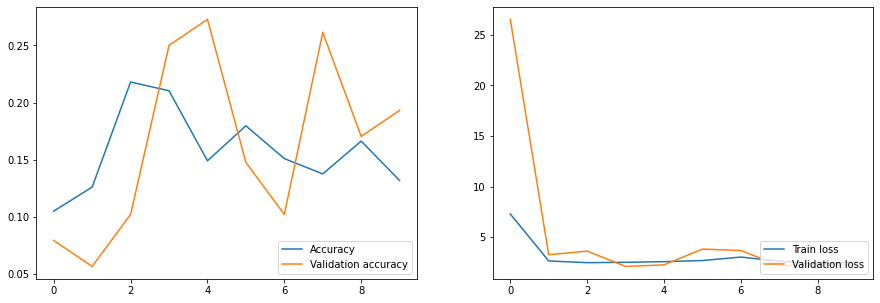

In [11]:
fig, sides = plt.subplots(1, 2, figsize=(15,5))

sides[0].plot(trained.history['accuracy'], label='Accuracy')
sides[0].plot(trained.history['val_accuracy'], label = 'Validation accuracy')
sides[0].legend(loc='lower right')


sides[1].plot(trained.epoch, trained.history["loss"], label="Train loss")
sides[1].plot(trained.epoch, trained.history["val_loss"], label="Validation loss")
sides[1].legend(loc='lower right')